# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image
from numpy import asarray
from os.path import dirname, join as pjoin
import scipy.io as sio
import json
import time
import cv2
import matplotlib.cm as cm
from tensorflow.keras.applications.vgg16 import preprocess_input

### Images

In [2]:
def load_dataset_jpg_resize(path_data):

        
    lista_images=[]

    # Append images to a list
    for item in os.listdir(path_data):
        if os.path.isfile(path_data+item) & (item.endswith(".jpg")):
            im = Image.open(path_data+item).convert("RGB")
            new_image = im.resize((640//8, 480//8))
            im = np.array(new_image)
            lista_images.append(np.array(im))
    
            
    return lista_images

In [3]:
images_Mall_resize = load_dataset_jpg_resize('frames/')

In [4]:
# Convert and save the list of images in '.npy' format
np.save("images_Mall_resize.npy",images_Mall_resize)

In [5]:
images_MALL_resize = np.load("images_Mall_resize.npy")
images_MALL_resize.shape

(2000, 60, 80, 3)

### Ground truth and labels

In [6]:
# ground truth

gt_MALL = sio.loadmat("mall_gt.mat")

In [5]:
labels_MALL = [len(gt_MALL["frame"][0,i][0,0][0]) for i in range(2000)]

In [6]:
# Convert and save the list of images in '.npy' format
np.save("labels_MALL.npy",labels_MALL)

In [7]:
labels_MALL = np.load("labels_MALL.npy")
labels_MALL.shape

(2000,)

## Density function - 1/8 resolution

In [8]:
def density_MALL_low_resolution(img_number):
    
    '''
    Input:
    - img_number: number of the image
    ''' 
          
    output = np.zeros(images_MALL_resize[img_number].shape[:-1])
    x_full = gt_MALL["frame"][0, img_number][0, 0][0][:,0]/8 
    y_full = gt_MALL["frame"][0, img_number][0, 0][0][:,1]/8

    for x, y in zip(x_full, y_full):
        density_img = np.zeros(images_MALL_resize[img_number].shape[:-1])
        try:
            density_img[round(y),round(x)] = 1
        except:
            pass

        sigma = 3 
        kernel_size = 3

        density_img = cv2.GaussianBlur(density_img, (kernel_size,kernel_size), sigma)
        output += density_img    
    
    return cv2.GaussianBlur(output, (11,11), sigma)

Time: 0.0027625560760498047


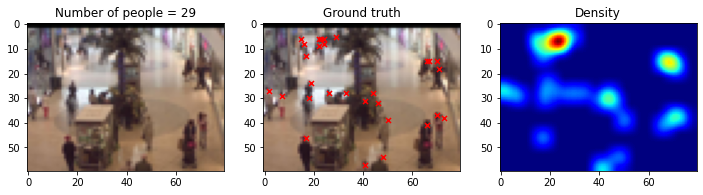

In [9]:
# density map on first image of MALL dataset

start = time.time()
ds = density_MALL_low_resolution(0)
print(f"Time: {time.time() - start}")

plt.figure(figsize=(12, 9))

#image with label
plt.subplot(1, 3, 1)
plt.imshow(images_MALL_resize[0])
plt.title(f"Number of people = {labels_MALL[0]}")

# image with ground truth
plt.subplot(1, 3, 2)
plt.imshow(images_MALL_resize[0])
for x,y in gt_MALL["frame"][0, 0][0, 0][0]/8:
    plt.scatter(round(x),round(y), s = 25, marker = "x", color = "r")
plt.title("Ground truth")

# image with density map
plt.subplot(1, 3, 3)
plt.imshow(ds , cmap = cm.jet)
_ = plt.title("Density")

### Density images

In [11]:
dens_images_MALL_resize = []

for img in range(images_MALL_resize.shape[0]):
    dens_images_MALL_resize.append(density_MALL_low_resolution(img))


In [12]:
# Convert and save the list of images in '.npy' format
np.save("density_MALL_resize.npy",dens_images_MALL_resize)

In [13]:
density_MALL_resize = np.load("density_MALL_resize.npy")
density_MALL_resize.shape

(2000, 60, 80)

## Train and test

In [14]:
# train
Dens_train_resize = density_MALL_resize[:800]

# test
Dens_test_resize = density_MALL_resize[800:]

In [18]:
np.save("dens_train_MALL_resize.npy",Dens_train_resize)

np.save("dens_test_MALL_resize.npy",Dens_test_resize)

In [19]:
density_train_MALL_resize = np.load("dens_train_MALL_resize.npy")
density_train_MALL_resize.shape

(800, 60, 80)

In [20]:
density_test_MALL_resize = np.load("dens_test_MALL_resize.npy")
density_test_MALL_resize.shape

(1200, 60, 80)

## Datasets divided

In [21]:
half_dens_train_MALL_resize = density_train_MALL_resize[:400]

np.save("half_dens_train_MALL_resize.npy",half_dens_train_MALL_resize)

In [22]:
half2_dens_train_MALL_resize = density_train_MALL_resize[400:]

np.save("half2_dens_train_MALL_resize.npy",half2_dens_train_MALL_resize)